In [23]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier


In [24]:
df = pd.read_csv("resources/heart_attack_prediction_dataset 2.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [25]:
df['Heart Attack Risk'].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

/var/folders/44/b8261lv57136y15mwmjzj7kc0000gn/T/ipykernel_30215/1158117576.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

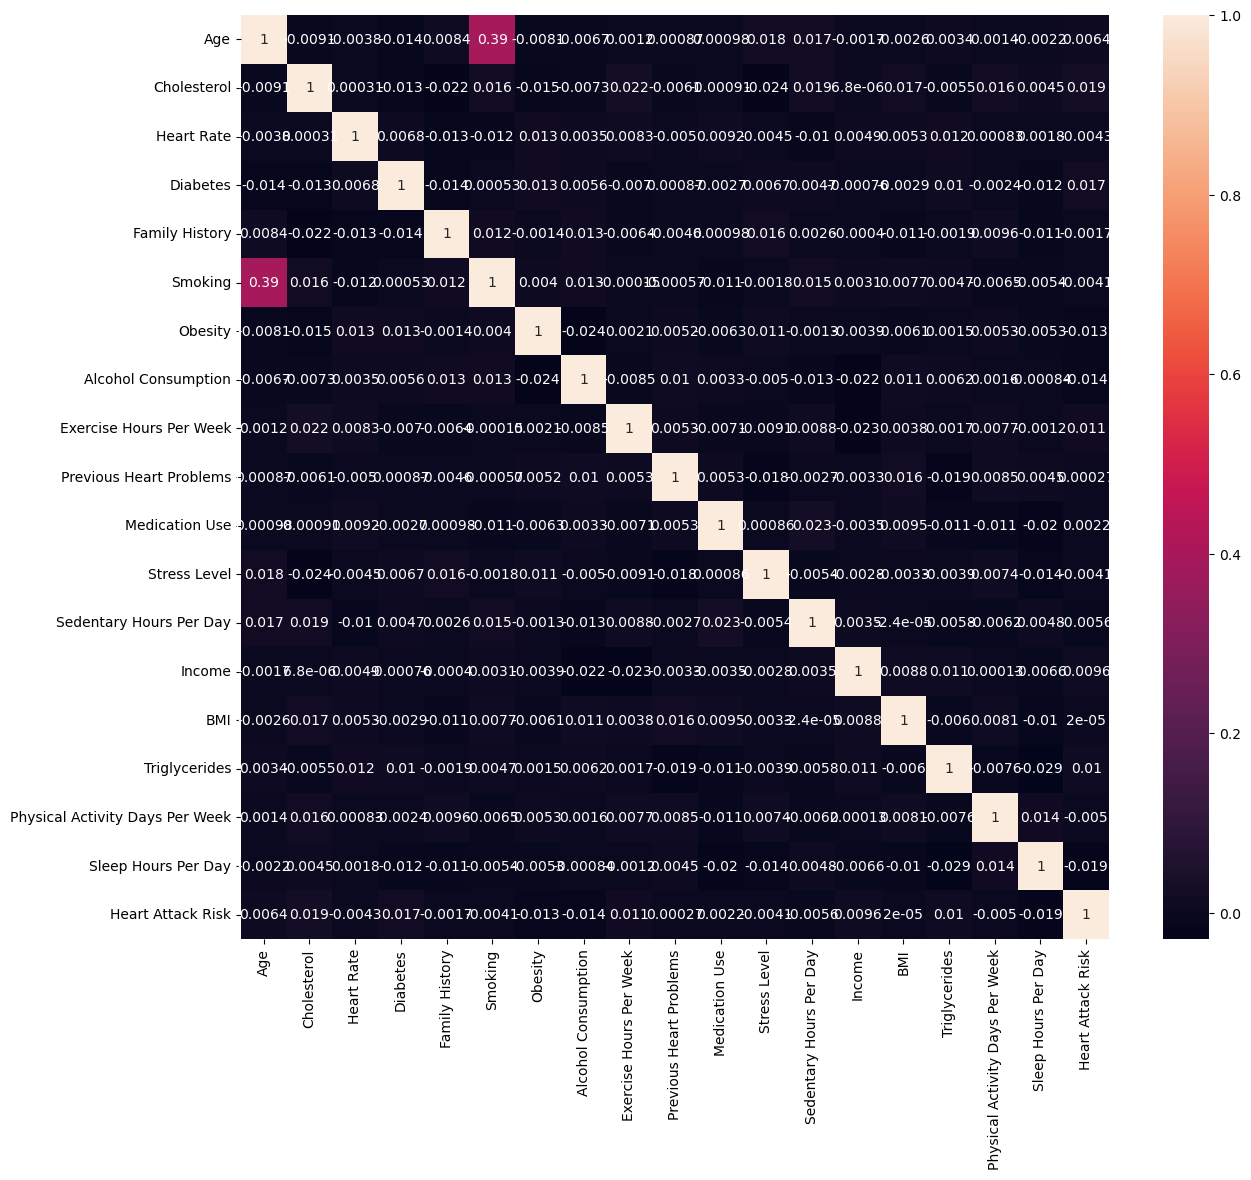

In [26]:
plt.figure(figsize=(14,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [27]:
# Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

# Drop the original 'Blood Pressure' column
df.drop(columns=['Blood Pressure'], inplace=True)

In [28]:
df.drop(columns=['Patient ID'], inplace=True)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Alcohol Consumption'] = label_encoder.fit_transform(df['Alcohol Consumption'])
df['Diet'] = label_encoder.fit_transform(df['Diet'])
#df = pd.get_dummies(df, columns=['Country', 'Continent','Hemisphere'], drop_first=True)
df = df.drop(columns=['Country', 'Continent','Hemisphere'])



In [29]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


In [30]:
X = df.drop('Heart Attack Risk', axis = 1)
y = df['Heart Attack Risk']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),

}

for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
  
    

Training Logistic Regression...
Logistic Regression Accuracy: 0.65
Training Decision Tree...
Decision Tree Accuracy: 0.56
Training Random Forest...
Random Forest Accuracy: 0.64
Training SVM...
SVM Accuracy: 0.65
Training KNN...
KNN Accuracy: 0.58
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.64


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame and 'Heart Attack Risk' is your target variable
X = df.drop('Heart Attack Risk', axis=1)  # Features
y = df['Heart Attack Risk']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a Lasso regression model
lasso = Lasso(alpha=10)  # You can adjust the alpha parameter for regularization strength

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Get the coefficients
coefficients = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
print(coefficients[coefficients['Coefficient'] != 0])  # Display non-zero coefficients

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Alpha:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Mean Squared Error: 0.23
R^2 Score: -0.00
         Coefficient
Income  7.045808e-08
Best Alpha: {'alpha': 10}
Best MSE: 0.23029165100563112


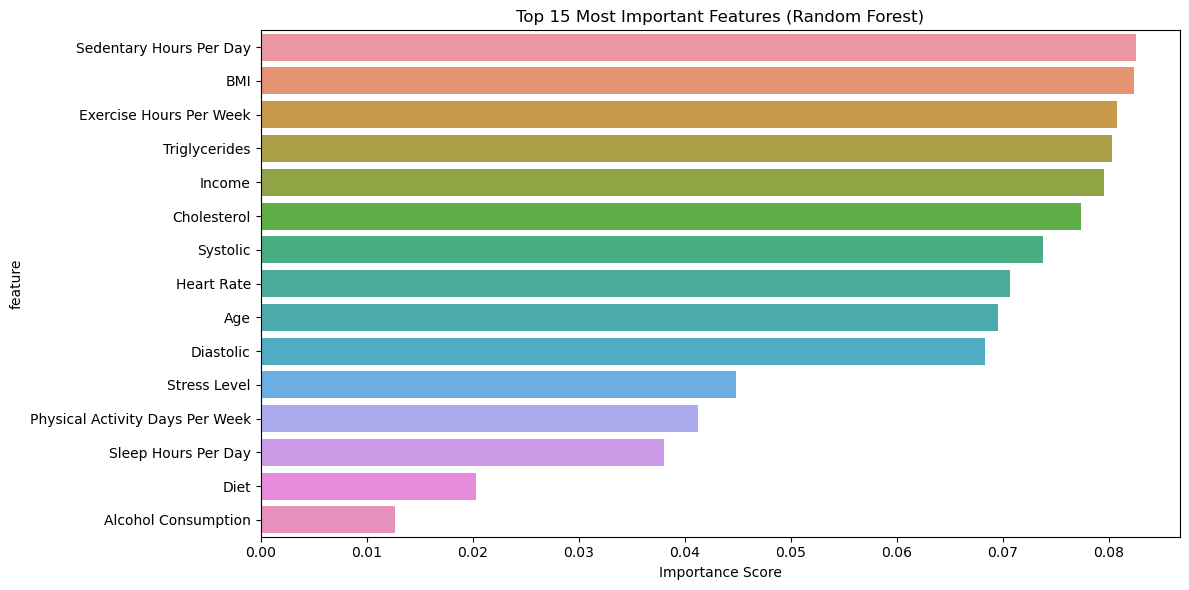

In [35]:
# 1. Random Forest Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

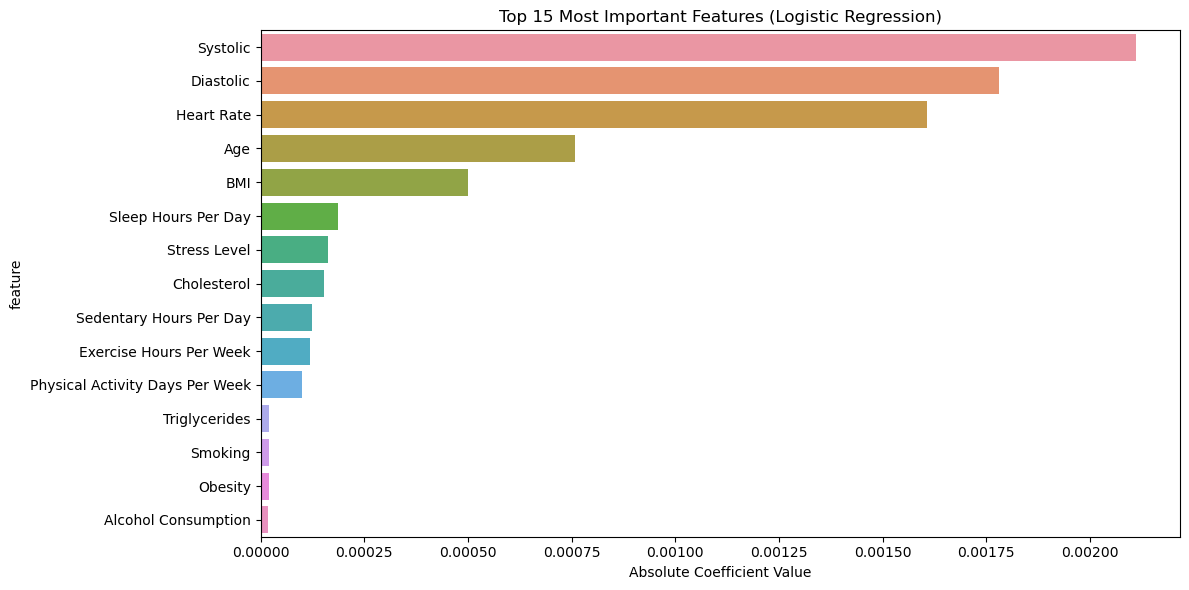

In [36]:
# 2. Logistic Regression Coefficients (absolute values)
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Get absolute coefficients
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(lr_model.coef_[0])
})
feature_importance_lr = feature_importance_lr.sort_values('importance', ascending=False)

# Plot logistic regression coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_lr.head(15))
plt.title('Top 15 Most Important Features (Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

Top 6 Most Important Features:
                    feature  importance
14  Sedentary Hours Per Day    0.082585
16                      BMI    0.082349
9   Exercise Hours Per Week    0.080737
17            Triglycerides    0.080299
15                   Income    0.079582
2               Cholesterol    0.077334


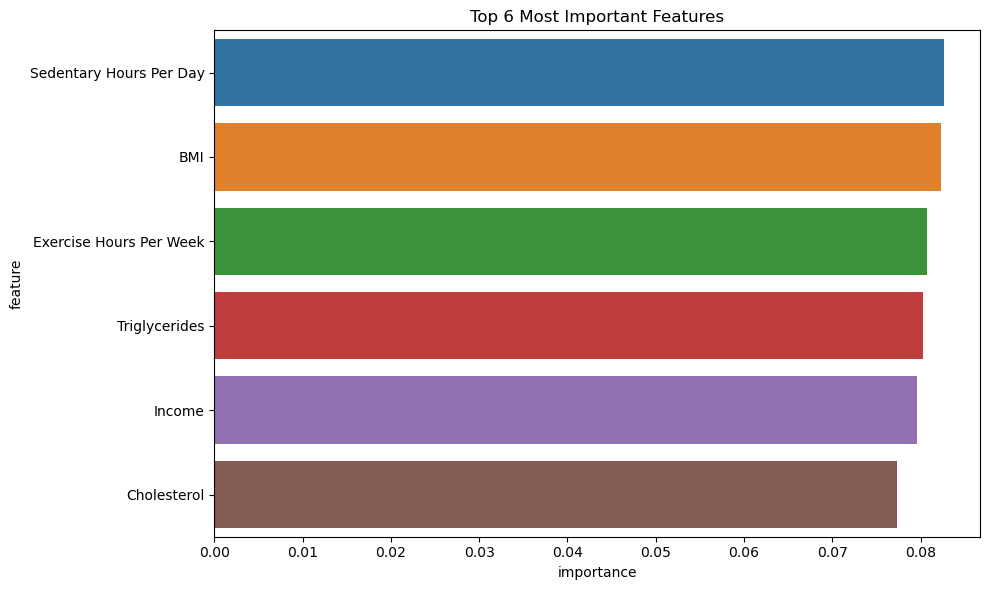


Model Performance with Top 6 Features:
----------------------------------------
Logistic Regression Accuracy: 0.646
Training Accuracy: 0.64
Decision Tree Accuracy: 0.531
Training Accuracy: 1.0
Random Forest Accuracy: 0.611
Training Accuracy: 1.0
SVM Accuracy: 0.646
Training Accuracy: 0.64
KNN Accuracy: 0.559
Training Accuracy: 0.719
Gradient Boosting Accuracy: 0.642
Training Accuracy: 0.657


In [37]:
# First, let's identify the top features using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print and plot top features
print("Top 6 Most Important Features:")
print(feature_importance.head(6))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(6))
plt.title('Top 6 Most Important Features')
plt.tight_layout()
plt.show()

# Now let's create a new dataset with only top 6 features
top_features = feature_importance.head(5)['feature'].tolist()
X_top = df[top_features]

# Split and scale the data
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, random_state=42)
scaler = StandardScaler()
X_train_top = scaler.fit_transform(X_train_top)
X_test_top = scaler.transform(X_test_top)

# Run models with top features
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

print("\nModel Performance with Top 6 Features:")
print("-" * 40)

for name, model in models.items():
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)
    y_train_pred = model.predict(X_train_top)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,3)}")
    print(f"Training Accuracy: {np.round(train_accuracy,3)}")


In [38]:
# Get predictions from the best performing model (Logistic Regression in this case)
lr_model = LogisticRegression()
lr_model.fit(X_train_top, y_train)
predictions = lr_model.predict(scaler.transform(df[top_features]))

# Add predictions to original dataframe
df['Predicted_Risk'] = predictions

# Add prediction probability scores
prediction_proba = lr_model.predict_proba(scaler.transform(df[top_features]))
df['Risk_Probability'] = prediction_proba[:, 1]  # Probability of class 1 (having heart attack)

# Show comparison between actual and predicted values
print("\nFirst few rows with actual and predicted values:")
print(df[['Heart Attack Risk', 'Predicted_Risk', 'Risk_Probability']].head())

# Calculate accuracy
accuracy = (df['Heart Attack Risk'] == df['Predicted_Risk']).mean()
print(f"\nOverall Model Accuracy: {accuracy:.3f}")

# Show confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print("\nConfusion Matrix:")
print(confusion_matrix(df['Heart Attack Risk'], df['Predicted_Risk']))
print("\nClassification Report:")
print(classification_report(df['Heart Attack Risk'], df['Predicted_Risk']))


First few rows with actual and predicted values:
   Heart Attack Risk  Predicted_Risk  Risk_Probability
0                  0               0          0.359556
1                  0               0          0.352420
2                  0               0          0.360071
3                  0               0          0.365067
4                  0               0          0.341662

Overall Model Accuracy: 0.642

Confusion Matrix:
[[5624    0]
 [3139    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      5624
           1       0.00      0.00      0.00      3139

    accuracy                           0.64      8763
   macro avg       0.32      0.50      0.39      8763
weighted avg       0.41      0.64      0.50      8763



/Users/mati/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mati/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mati/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
df['Predicted_Risk'].value_counts()

0    8763
Name: Predicted_Risk, dtype: int64

In [40]:
# Get predictions from the best performing model (Logistic Regression in this case)
lr_model = LogisticRegression()
lr_model.fit(X_train_top, y_train)
predictions = lr_model.predict(scaler.transform(df[top_features]))

# Add predictions to original dataframe
df['Predicted_Risk'] = predictions

# Add prediction probability scores
prediction_proba = lr_model.predict_proba(scaler.transform(df[top_features]))
df['Risk_Probability'] = prediction_proba[:, 1]  # Probability of class 1 (having heart attack)

# Show comparison between actual and predicted values
print("\nFirst few rows with actual and predicted values:")
print(df[['Heart Attack Risk', 'Predicted_Risk', 'Risk_Probability']].head())

# Calculate accuracy
accuracy = (df['Heart Attack Risk'] == df['Predicted_Risk']).mean()
print(f"\nOverall Model Accuracy: {accuracy:.3f}")

# Show confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print("\nConfusion Matrix:")
print(confusion_matrix(df['Heart Attack Risk'], df['Predicted_Risk']))
print("\nClassification Report:")
print(classification_report(df['Heart Attack Risk'], df['Predicted_Risk']))


First few rows with actual and predicted values:
   Heart Attack Risk  Predicted_Risk  Risk_Probability
0                  0               0          0.359556
1                  0               0          0.352420
2                  0               0          0.360071
3                  0               0          0.365067
4                  0               0          0.341662

Overall Model Accuracy: 0.642

Confusion Matrix:
[[5624    0]
 [3139    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      5624
           1       0.00      0.00      0.00      3139

    accuracy                           0.64      8763
   macro avg       0.32      0.50      0.39      8763
weighted avg       0.41      0.64      0.50      8763



/Users/mati/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mati/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mati/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
def evaluate_model_and_add_predictions(model, X_train, X_test, y_train, y_test, df, feature_columns):
    """
    Evaluates a model's performance and adds predictions to the dataframe
    
    Parameters:
    -----------
    model : sklearn model object
        The machine learning model to evaluate
    X_train : array-like
        Training features
    X_test : array-like
        Test features
    y_train : array-like
        Training target
    y_test : array-like
        Test target
    df : pandas DataFrame
        Original dataframe to add predictions to
    feature_columns : list
        List of feature column names used for prediction
    
    Returns:
    --------
    dict : Dictionary containing model performance metrics
    """
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get predictions for train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Get predictions for full dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[feature_columns])
    predictions = model.predict(X_scaled)
    
    # Add predictions to dataframe
    df['Predicted_Risk'] = predictions
    
    # Add prediction probabilities if model supports it
    if hasattr(model, 'predict_proba'):
        prediction_proba = model.predict_proba(X_scaled)
        df['Risk_Probability'] = prediction_proba[:, 1]
    
    # Calculate overall accuracy
    overall_accuracy = (df['Heart Attack Risk'] == df['Predicted_Risk']).mean()
    
    # Get confusion matrix and classification report
    conf_matrix = confusion_matrix(df['Heart Attack Risk'], df['Predicted_Risk'])
    class_report = classification_report(df['Heart Attack Risk'], df['Predicted_Risk'])
    
    # Print results
    print(f"\nModel Performance Metrics:")
    print("-" * 40)
    print(f"Training Accuracy: {train_accuracy:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")
    print(f"Overall Accuracy: {overall_accuracy:.3f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    
    # Return metrics dictionary
    return {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'overall_accuracy': overall_accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

In [52]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})

features = feature_importance.sort_values('importance', ascending=False).head(5).feature.tolist()


svm_metrics = evaluate_model_and_add_predictions(
    rf_model,
    X_train_top,
    X_test_top,
    y_train,
    y_test,
    df,
    features
)




Model Performance Metrics:
----------------------------------------
Training Accuracy: 1.000
Test Accuracy: 0.610
Overall Accuracy: 0.900

Confusion Matrix:
[[5473  151]
 [ 728 2411]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      5624
           1       0.94      0.77      0.85      3139

    accuracy                           0.90      8763
   macro avg       0.91      0.87      0.89      8763
weighted avg       0.90      0.90      0.90      8763



In [53]:
df['Heart Attack Risk'].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64